In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# use seaborn plotting defaults
import seaborn as sns; sns.set()

# TASK 1. SVM (3 Points): Support Vector Machines

**Support vector machines (SVMs)** are a particularly powerful and flexible class of supervised algorithms for both classification and regression. In this section, we will develop the intuition behind support vector machines and their use in **classification problems**. 

The goal is to find a line or curve (in two dimensions) or manifold (in higher dimensions) that **separates the classes from each other**. The SVM tries to separate the two sets with the **biggest margin possible**.

Note: In order to plot the data and the decision boundaries of the applied model, we will use the function `plot_svc_decision_function` for multiple sub-tasks.

In [2]:
# Helper function to plot the decision boundary of an Support Vector Machine for Classification
# You do not need to read / understand how it works.

def plot_svc_decision_function(model, X, y):
    """
    Plot the decision function for a 2D SVC

    model: a fitted SVM model of type sklearn.svm.LinearSVC or sklearn.svm.SVC
    X: a 2D numpy array of shape [n_samples, 2], containing data points to be classified
    y: a 1D numpy array of shape [n_samples], containing the labels for the data points, labels should be 0 or 1
    """
    plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

Let's create artificial data with two classes.

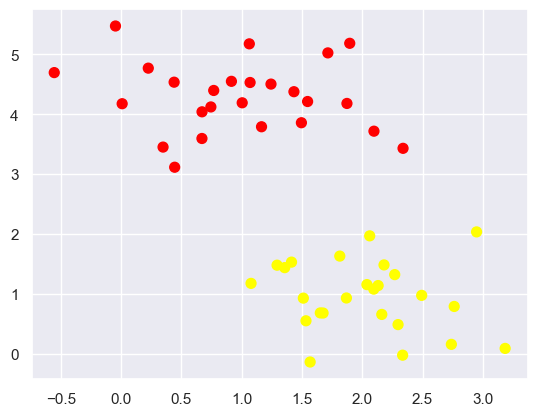

In [3]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

### Applying SVM 

In this task we will use the `LinearSVC` model of `sklearn.svm`. `sklearn`'s module `svm` has implementations of several Support Vector Machine algorithms. Some are meant to solve Regression, some - Classification problems. `LinearSVC` stands for Linear Support Vector Classification which is exactly what we need in order to solve the present problem.

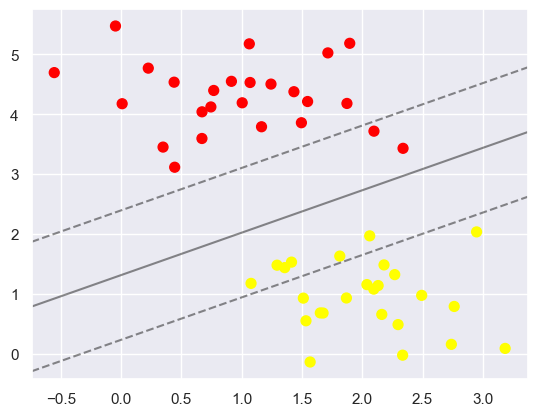

In [4]:
from sklearn.svm import LinearSVC
model = LinearSVC() # initialize the model
model.fit(X, y) # fit the model = learn the decision boundaries

plot_svc_decision_function(model, X, y)

In the plot you see a solid and 2 dashed lines. 

The solid line shows the decision boundary, meaning points on one side will be assigned to the yellow class and on the other side to the red class. In this case all
data points lie on the correct side of the decision boundary, meaning our classifier has successfully learned to separate the classes.

The dashed lines visualize the margin of the SVM classifier. You can see that a
few points lie inside the margin. This is because, in practice, we use a soft-margin implementation for SVM. This means that we allow data points to be inside the margin, or even on the wrong side of the boundary, but during training we "punish" these points.

In the next excercise you will play with the `C` parameter of `LinearSVC`. This
parameter controls how much we "punish" points inside (or on the wrong side) of the margin.


### 1a. Regularization
Try different values for the parameter `C` and try to find out what happens:


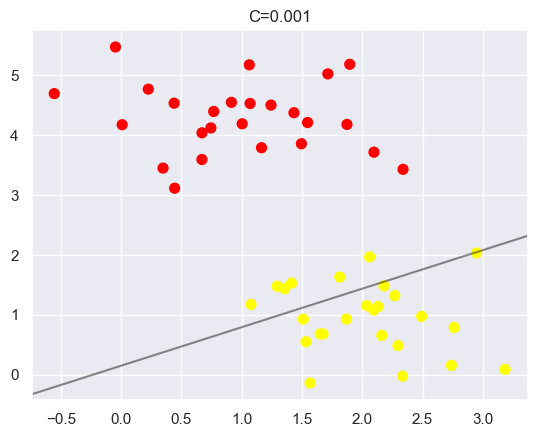

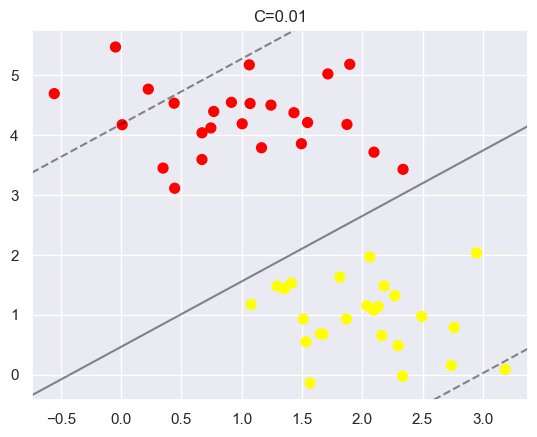

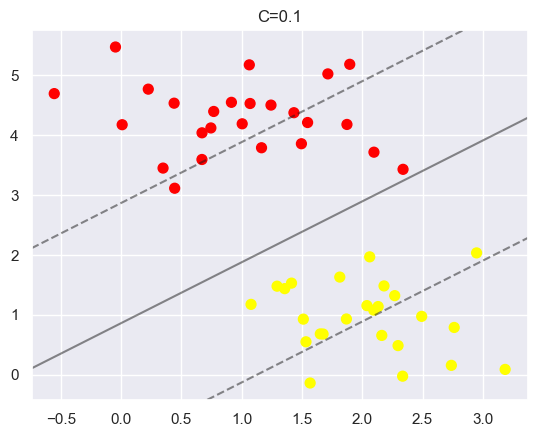

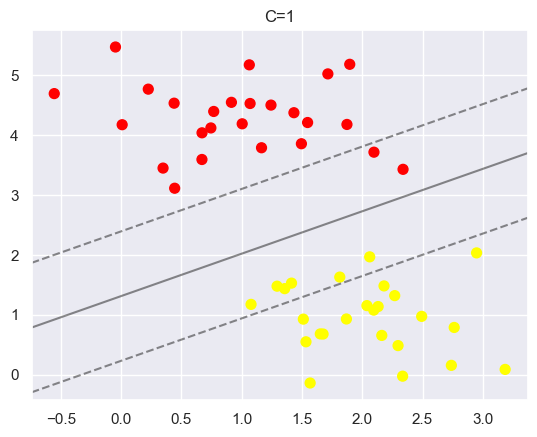

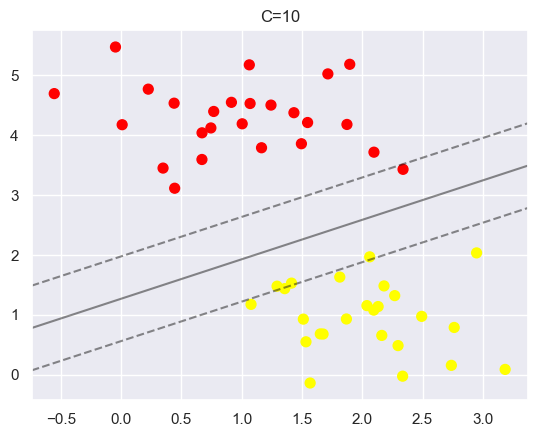

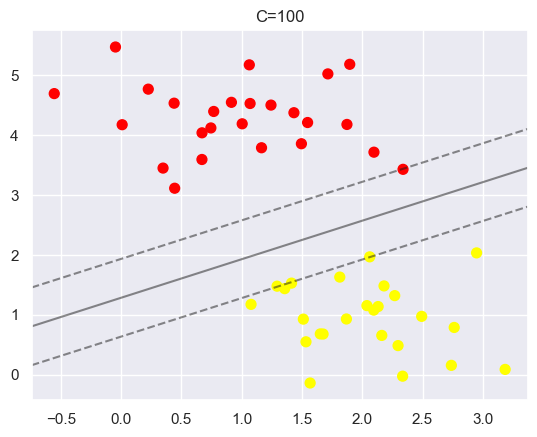

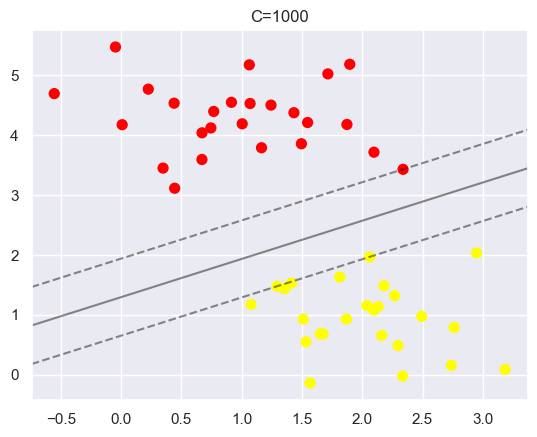

In [6]:
for c in [0.001, 0.01, 0.1, 1, 10, 100, 1000]:
    # create an instance of LinearSVC and set its parameter C
    # call its .fit method to train it on X and y
    
    model =  LinearSVC(C=c).fit(X, y)

    plot_svc_decision_function(model, X, y)
    plt.title(f"C={c}")
    plt.show()

### 1b. We add a new datapoint

We will now add a new red data point, that lies very close to the cluster of yellow points.

In real world datasets, we run into this situation all the time. One reason can be that some data points really do look very similar but belong to different classes (e.g. imagine distinguishing a crocodile from an alligator). Another reason could be that the data point would really belong to the other (yellow) class but has been annotated badly.

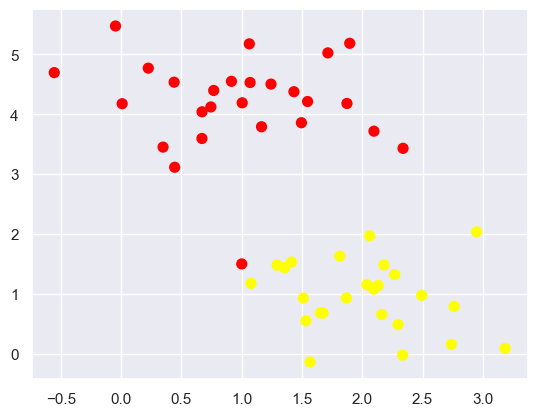

In [7]:
X2 = np.append(X, [[1., 1.5]], axis=0)
y2 = np.append(y, [0], axis=0)

plt.scatter(X2[:, 0], X2[:, 1], c=y2, s=50, cmap='autumn')

Rerun the examle from above, i.e. train a `LinearSVC` with different values of `C` and see what changes.

Pay particular attention to how the new data point changes the outcome.

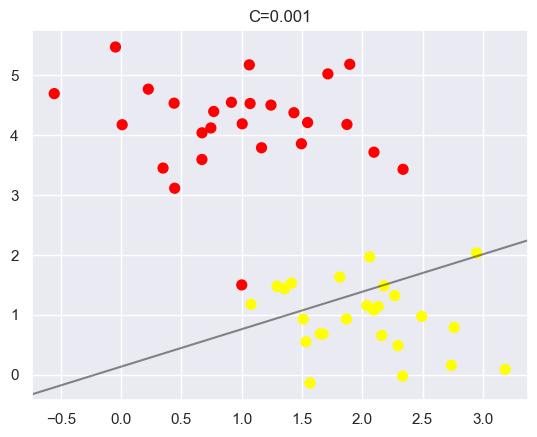

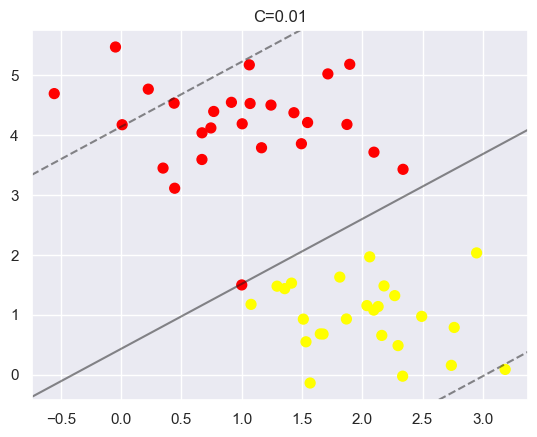

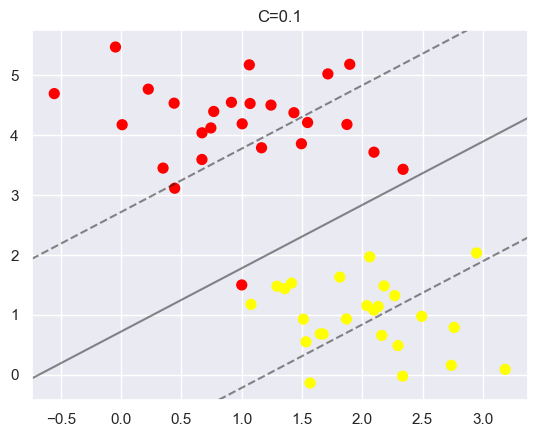

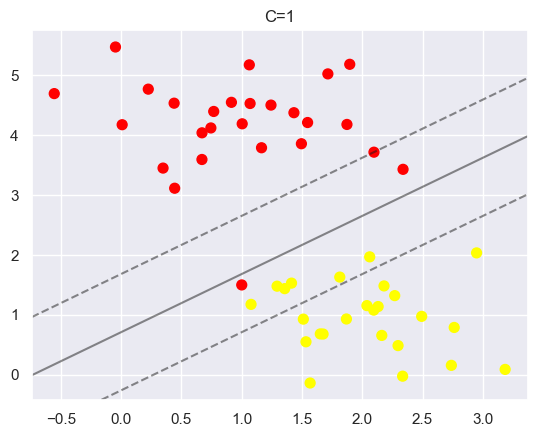

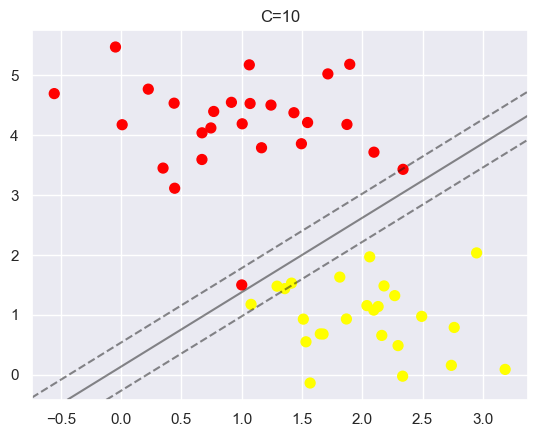

c:\Users\jonas\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


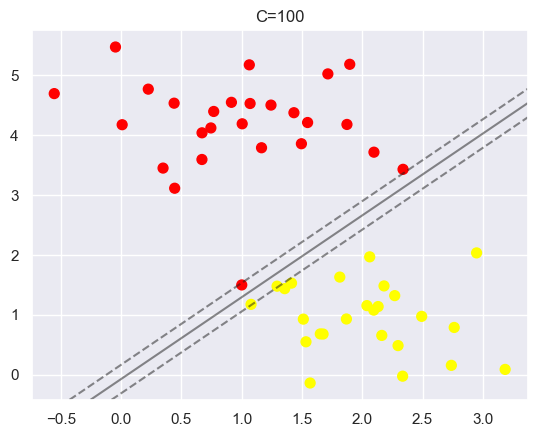

c:\Users\jonas\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


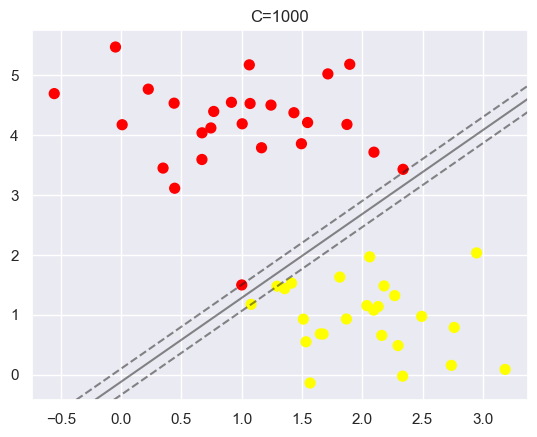

In [8]:
for c in [0.001, 0.01, 0.1, 1, 10, 100, 1000]:
    # create an instance of LinearSVC and set its parameter C
    # call its .fit method to train it on X2 and y2
    
    model =  LinearSVC(C=c).fit(X2, y2)

    plot_svc_decision_function(model, X2, y2)
    plt.title(f"C={c}")
    plt.show()

## 📢 **HAND-IN** 📢: Answer following question in Moodle:

Based on the experiments above, which value for `C` would you choose for the new data, and **why**?



# TASK 2. Support Vector Machines - Unbalanced Data (3 points)

How to handle unbalanced classes with SVM? Below you see an example of an unbalanced problem. There are 1000 red samples and just 100 yellow samples. The SVM is very sensitive to this. Here we will explore the SVMs behaviour in the unbalanced case.

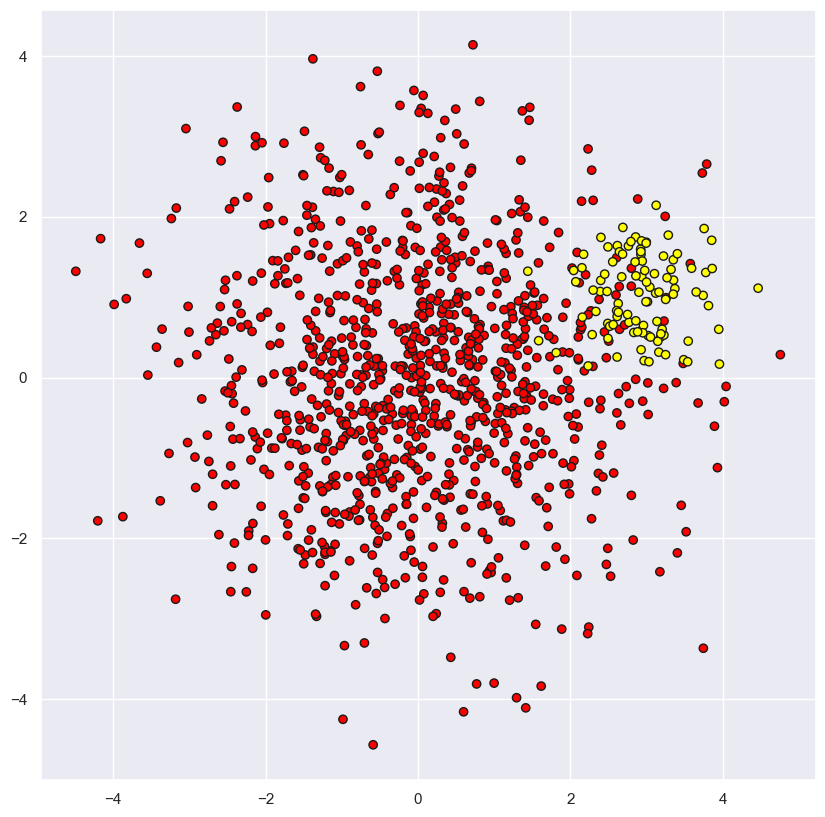

In [9]:
plt.figure(figsize=(10.0, 10.0))

# we create clusters with 1000 and 100 points
rng = np.random.RandomState(0)
n_samples_1 = 1000
n_samples_2 = 100
X_unbal = np.r_[1.5 * rng.randn(n_samples_1, 2), 0.5 * rng.randn(n_samples_2, 2) + [3, 1]]
y_unbal = [0] * (n_samples_1) + [1] * (n_samples_2)

plt.scatter(X_unbal[:, 0], X_unbal[:, 1], c=y_unbal, cmap='autumn', edgecolors='k')

### Default solution

In the cells below, you see a simple way to classify the above data.
* We use `LinearSVC` with default parameters as our model and fit it on the unbalanced data
* We visualize the resulting decision boundary
* We compute performance metrics

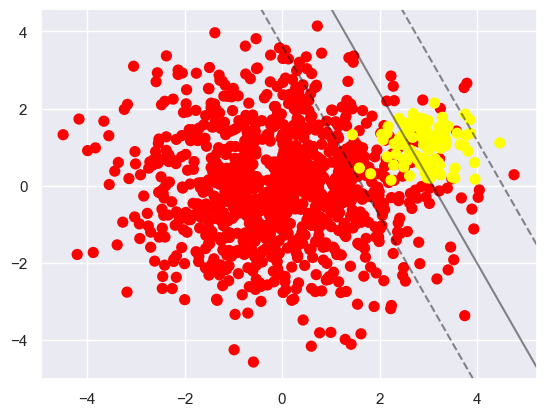

In [10]:
# This should look familiar by now.

clf = LinearSVC()
clf.fit(X_unbal, y_unbal)

plot_svc_decision_function(clf, X_unbal, y_unbal)

In [11]:
from sklearn.metrics import classification_report

# get predictions from the classifier
# it will assign red to all points to the left of the solid line and yellow to the points on the right side  
y_pred = clf.predict(X_unbal)

# the function classification_report computes precision, recall, and F1 score
# and returns a nicely formatted string
# it takes the true labels as argument y_true and predicted labels as y_pred
# the digits argument controls how many decimal points are printed
# the support column in the output shows how many data points belong to each class
print(classification_report(y_true=y_unbal, y_pred=y_pred, digits=3))

              precision    recall  f1-score   support

           0      0.971     0.975     0.973      1000
           1      0.740     0.710     0.724       100

    accuracy                          0.951      1100
   macro avg      0.855     0.843     0.849      1100
weighted avg      0.950     0.951     0.950      1100



### 2a. Handle unbalanced data using class weights

In this exercise we will explore how the `class_weight` parameter can be used to handle unbalanced data.

We have seen previously that `C` "punishes" data points that lie on the wrong side of the classification boundary. The `class_weight` parameter follows a similar idea. It allows us to control how harshly we punish points on the wrong
side for each class separately. For example, we could choose to force more yellow points to be on the right of the boundary, by giving them more *weight*. This means they will be counted more during training and mis-classifications are punished more.

The default value for the `class_weight` parameter is `None` and means both
classes will have a weight of 1.

You can manually set weights using a dictionary:
```
my_class_weights = {
  0: 1.0,
  1: 1.0,
}
```
The keys correspond to the class labels (in our case 0 for red and 1 for yellow)
and the values correspond to the weight we want to set. We can then set `class_weight=my_class_weights`.


Finally, you can specify `class_weight='balanced'`. In that case, `sklearn` tries to automatically determine good class weights. Let $n$ be the total number of samples (1100 in our case), $c$ the total number of classes (2 in our case), and $n_i$ the number of samples in class $i$ (in our case $n_0 = 1000$ and $n_1 = 100$, then it computes the class weights $w_i$ as $w_i = \frac{n}{c n_i}$.

Choose a proper parameter for `class_weight` for example by manually trying out different values.

In [28]:
# fit the model using weighted classes

# change the class weights
my_class_weights = {
    0: 1.0,  # weight for red class
    1: 4.0,  # weight for yellow class
}
wclf = LinearSVC(class_weight=my_class_weights)  # create a LinearSVC and set its class_weight parameter
wclf.fit(X_unbal, y_unbal)

LinearSVC(class_weight={0: 1.0, 1: 4.0})

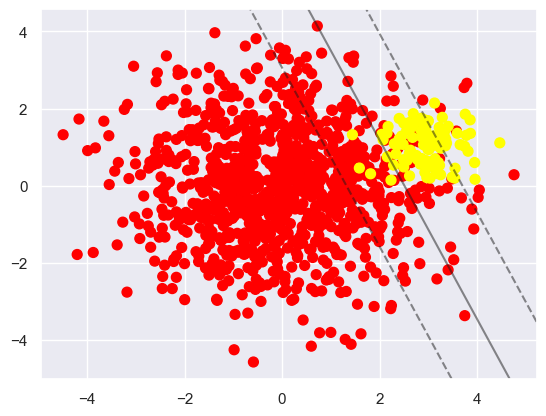

In [29]:
plot_svc_decision_function(wclf, X_unbal, y_unbal)

In [30]:
print(classification_report(y_true=y_unbal, y_pred=wclf.predict(X_unbal), digits=3))

              precision    recall  f1-score   support

           0      0.995     0.948     0.971      1000
           1      0.646     0.950     0.769       100

    accuracy                          0.948      1100
   macro avg      0.821     0.949     0.870      1100
weighted avg      0.963     0.948     0.952      1100



## 📢 **HAND-IN** 📢: Post following results in Moodle:

1. The code how you called the `LinearSVC` with proper `class_weight` settings. From the task 2a.
2. The classification report from the task 2a.



# Task 3. SVM Kernel Trick (2 points)
In this task we will investigate the case of non-linearly separable data. In order to handle such a case, the **Kernel Trick** can be used. We transform our data and map it into a **higher dimensional feature space** (e.g., if the data had two features (2D-space), it becomes 3D-space). The goal is that after the transformation to the higher dimensional space, the classes will be linearly separable. The decision boundary can then be fitted to separate the classes and make predictions. The decision boundary will be a hyperplane in this higher dimensional space.


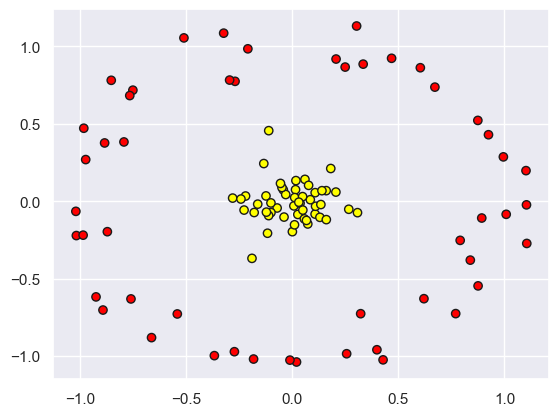

In [34]:
from sklearn.datasets import make_circles
X_non_linear, y_non_linear = make_circles(100, factor=.1, noise=.1)
plt.scatter(X_non_linear[:, 0], X_non_linear[:, 1], c=y_non_linear, cmap='autumn', edgecolors='k')

### Default model

Below you can see what happens if we naively train a `LinearSVC` model on this non-linear dataset.

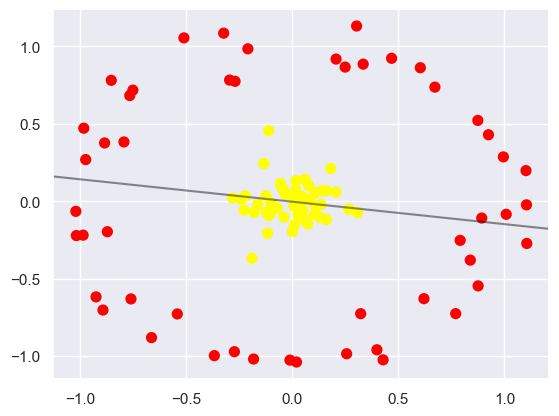

In [35]:
clf = LinearSVC().fit(X_non_linear, y_non_linear)
plot_svc_decision_function(clf, X_non_linear, y_non_linear)

In [36]:
print(classification_report(y_true=y_non_linear, y_pred=clf.predict(X_non_linear), digits=3))

              precision    recall  f1-score   support

           0      0.542     0.520     0.531        50
           1      0.538     0.560     0.549        50

    accuracy                          0.540       100
   macro avg      0.540     0.540     0.540       100
weighted avg      0.540     0.540     0.540       100



### Manually Adding a Helper Dimension

It is clear that no linear discrimination will ever be able to separate this data. We can think about how we might project the data into a higher dimension such that a linear separator would be sufficient. In the code below we compute a new value `r` based on the data points. Adding `r` as a new dimension to our data, we will see that the data becomes linearly separable.

We compute $r = e^{-||x||^2}$. We chose this because the data points lie on circles and $||x||^{2}$ corresponds to the radius of the circle that a data point lies on.

**Note** that this new dimension `r` is ONLY for the visualization of the data. In the next subtask, we will use the RBF kernel on the unchanged data to let the SVM find a proper projection by itself.

Text(0.5, 0, 'r')

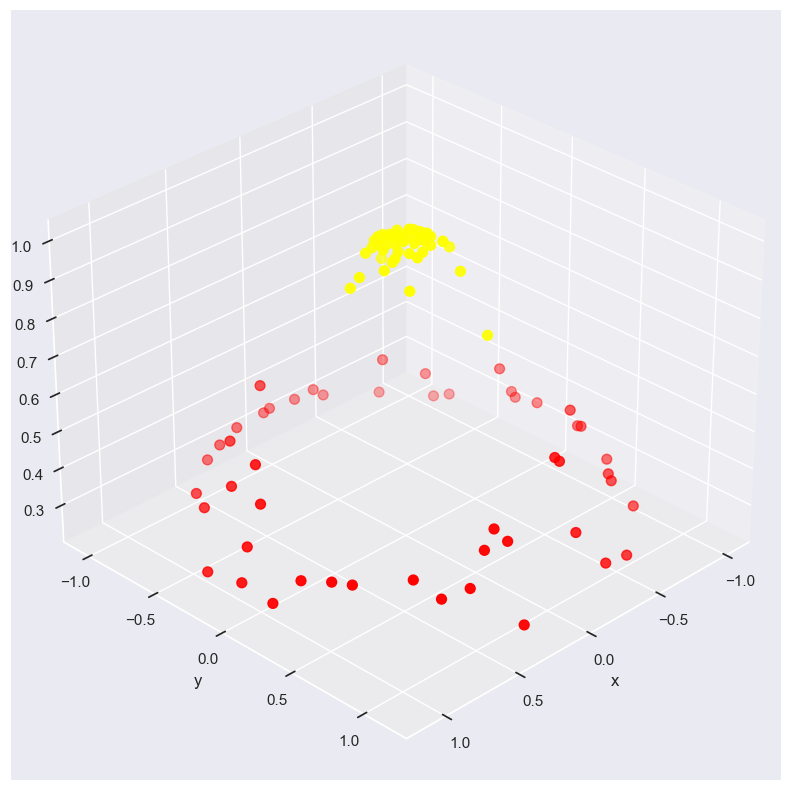

In [37]:
r = np.exp(-(X_non_linear ** 2).sum(1))

fig1=plt.figure(figsize=(10, 10))
ax = fig1.add_subplot(projection='3d')
ax.scatter3D(X_non_linear[:, 0], X_non_linear[:, 1], r, c=y_non_linear, s=50, cmap='autumn')
ax.view_init(elev=30, azim=45)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('r')

### 3a. Kernel Trick

To use the kernel trick, we need to replace `LinearSVC` by `SVC` and set the `kernel` we want to use. 

Use `kernel='rbf'` and fit an `SVC` model on `X_non_linear` and `y_non_linear`.

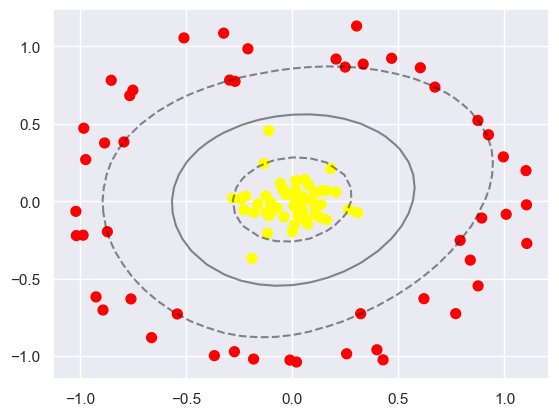

In [38]:
from sklearn.svm import SVC

# create an SVC an set its kernel parameter to 'rbf'
# train / fit it on X_non_linear and y_non_linear
clf = SVC(kernel='rbf').fit(X_non_linear, y_non_linear)

plot_svc_decision_function(clf, X_non_linear, y_non_linear)

In [39]:
print(classification_report(y_true=y_non_linear, y_pred=clf.predict(X_non_linear), digits=3))

              precision    recall  f1-score   support

           0      1.000     1.000     1.000        50
           1      1.000     1.000     1.000        50

    accuracy                          1.000       100
   macro avg      1.000     1.000     1.000       100
weighted avg      1.000     1.000     1.000       100



## 📢 **HAND-IN** 📢: Please answer in Moodle whether you solved this task.



#Task 4. TF-IDF (2 points)
In this task we will get to know 2 approaches to transform text to numerical features in order to use it with ML algorithms.
- **Bag of Words (BOW)**:  fixed-length vectors (n=vocabulary size among all documents) by counting how many times each word appears
- **TF-IDF**: also has length of vocabulary size among all documents but instead of simple counts, words are represented by their TFIDF-score, which is the number of times a word appears in the document but counterbalanced by the number of documents in which it is present.

In [40]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

Following is our toy-example to apply the transformation approaches. These are the reviews of a teddy bear. The sentences are already lower-cased and the punctuation was removed.


In [41]:
documents = ["it is literally so soft and good size get it if you are thinking about it so cute as well", 
             "a cuddly big adorable teddy bear what is not to love it is for my daughters baby shower a teddy bear theme love it", 
             "though this teddy is soft as true to size the way it was packaged resulted in it being limp and the face does not look right",
             "it was ok it needed a lot of fluffing never could get it to look like the picture",
             "this bear is sooo soft and great value for money my niece loves it so much",
             "the softnesss was good but there was hardly any stuffing in some places he is flat and does not sit up like photo",
             "got it for my daughter soft and cuddly but did not fluff enough head would not stay up alone"]

### 4a. Bag-of-words

Here we will conduct the Bag-of-Words transformation on our example. Go through the code and try to understand how it is done.

In [42]:
count = CountVectorizer() # initiate the model
bow = count.fit_transform(documents) # build vocabulary based on documents, do the counting and assign the counts to the corresonding words
bow.todense() # display dense vectors

matrix([[1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 3, 0, 0, 1, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
         1],
        [0, 1, 0, 0, 0, 0, 0, 1, 2, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
         0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2,
         0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
         0],
        [0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 0, 1, 0, 1, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
         0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
         0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 1, 0, 1, 0

In [43]:
# Get feature names / words represented in vocabulary
feature_names = count.get_feature_names_out()

# View feature names 
feature_names

array(['about', 'adorable', 'alone', 'and', 'any', 'are', 'as', 'baby',
       'bear', 'being', 'big', 'but', 'could', 'cuddly', 'cute',
       'daughter', 'daughters', 'did', 'does', 'enough', 'face', 'flat',
       'fluff', 'fluffing', 'for', 'get', 'good', 'got', 'great',
       'hardly', 'he', 'head', 'if', 'in', 'is', 'it', 'like', 'limp',
       'literally', 'look', 'lot', 'love', 'loves', 'money', 'much', 'my',
       'needed', 'never', 'niece', 'not', 'of', 'ok', 'packaged', 'photo',
       'picture', 'places', 'resulted', 'right', 'shower', 'sit', 'size',
       'so', 'soft', 'softnesss', 'some', 'sooo', 'stay', 'stuffing',
       'teddy', 'the', 'theme', 'there', 'thinking', 'this', 'though',
       'to', 'true', 'up', 'value', 'was', 'way', 'well', 'what', 'would',
       'you'], dtype=object)

In [47]:
pd.DataFrame(
    bow.todense(), 
    columns=feature_names
    )

,about,adorable,alone,and,any,are,as,baby,bear,being,big,but,could,cuddly,cute,daughter,daughters,did,does,enough,face,flat,fluff,fluffing,for,get,good,got,great,hardly,he,head,if,in,is,it,like,limp,literally,look,lot,love,loves,money,much,my,needed,never,niece,not,of,ok,packaged,photo,picture,places,resulted,right,shower,sit,size,so,soft,softnesss,some,sooo,stay,stuffing,teddy,the,theme,there,thinking,this,though,to,true,up,value,was,way,well,what,would,you
0,1,0,0,1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,1,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1
1,0,1,0,0,0,0,0,1,2,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2,2,0,0,0,0,0,2,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0
2,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,2,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,1,0,1,0,0,0,0,0,1,2,0,0,0,1,1,1,1,0,0,1,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,3,1,0,0,1,1,0,0,0,0,0,1,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
4,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
5,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,1,0,0,1,0,1,0,1,0,0,0,0,0,1,0,2,0,0,0,0,0
6,0,0,1,1,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0


### 4b. TF-IDF

`sklearn.feature_extraction.text.TfidfVectorizer` works in the same manner as `sklearn.feature_extraction.text.CountVectorizer`. Perform the same steps as in 4a but in oder to get vectors with TF-IDF values.

1. Initialize TfidfVectorizer model and transform our examples to numerical features.

In [48]:
tfidf = TfidfVectorizer()
tfidf_vectors = tfidf.fit_transform(documents)

2. Get the vocabulary

In [49]:


# Get feature names
feature_names_tfidf = tfidf.get_feature_names()

# View feature names
feature_names_tfidf



c:\Users\jonas\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['about',
 'adorable',
 'alone',
 'and',
 'any',
 'are',
 'as',
 'baby',
 'bear',
 'being',
 'big',
 'but',
 'could',
 'cuddly',
 'cute',
 'daughter',
 'daughters',
 'did',
 'does',
 'enough',
 'face',
 'flat',
 'fluff',
 'fluffing',
 'for',
 'get',
 'good',
 'got',
 'great',
 'hardly',
 'he',
 'head',
 'if',
 'in',
 'is',
 'it',
 'like',
 'limp',
 'literally',
 'look',
 'lot',
 'love',
 'loves',
 'money',
 'much',
 'my',
 'needed',
 'never',
 'niece',
 'not',
 'of',
 'ok',
 'packaged',
 'photo',
 'picture',
 'places',
 'resulted',
 'right',
 'shower',
 'sit',
 'size',
 'so',
 'soft',
 'softnesss',
 'some',
 'sooo',
 'stay',
 'stuffing',
 'teddy',
 'the',
 'theme',
 'there',
 'thinking',
 'this',
 'though',
 'to',
 'true',
 'up',
 'value',
 'was',
 'way',
 'well',
 'what',
 'would',
 'you']

3. Display the dataframe containing vocabulary in columns, documents presented in rows and TF-IDF values in cells.

In [59]:
tfidf_data = pd.DataFrame(
    tfidf_vectors, 
    columns=feature_names_tfidf
    )
tfidf_data

,about,adorable,alone,and,any,are,as,baby,bear,being,big,but,could,cuddly,cute,daughter,daughters,did,does,enough,face,flat,fluff,fluffing,for,get,good,got,great,hardly,he,head,if,in,is,it,like,limp,literally,look,lot,love,loves,money,much,my,needed,never,niece,not,of,ok,packaged,photo,picture,places,resulted,right,shower,sit,size,so,soft,softnesss,some,sooo,stay,stuffing,teddy,the,theme,there,thinking,this,though,to,true,up,value,was,way,well,what,would,you
0,0.246146,0.000000,0.00000,0.132824,0.000000,0.246146,0.204322,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.246146,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.204322,0.204322,0.00000,0.00000,0.000000,0.000000,0.00000,0.246146,0.000000,0.132824,0.350771,0.000000,0.000000,0.246146,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.204322,0.408645,0.151631,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.246146,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.246146,0.000000,0.00000,0.246146
1,0.000000,0.217399,0.00000,0.000000,0.000000,0.000000,0.000000,0.217399,0.360920,0.000000,0.217399,0.000000,0.000000,0.18046,0.000000,0.00000,0.217399,0.00000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.154251,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.234624,0.206537,0.000000,0.000000,0.000000,0.000000,0.000000,0.434798,0.00000,0.00000,0.00000,0.154251,0.000000,0.000000,0.00000,0.133922,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.217399,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.360920,0.000000,0.217399,0.000000,0.000000,0.000000,0.000000,0.154251,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.217399,0.00000,0.000000
2,0.000000,0.000000,0.00000,0.123511,0.000000,0.000000,0.189996,0.000000,0.000000,0.228888,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.189996,0.00000,0.228888,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.00000,0.000000,0.189996,0.123511,0.217451,0.000000,0.228888,0.000000,0.189996,0.000000,0.000000,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.00000,0.140999,0.000000,0.000000,0.228888,0.000000,0.000000,0.000000,0.228888,0.228888,0.000000,0.000000,0.189996,0.000000,0.140999,0.000000,0.000000,0.00000,0.00000,0.000000,0.189996,0.324805,0.000000,0.000000,0.000000,0.189996,0.228888,0.162403,0.228888,0.000000,0.00000,0.162403,0.228888,0.000000,0.000000,0.00000,0.000000
3,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.271081,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.00000,0.271081,0.000000,0.225021,0.000000,0.00000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.386305,0.225021,0.000000,0.000000,0.225021,0.271081,0.000000,0.00000,0.00000,0.00000,0.000000,0.271081,0.271081,0.00000,0.000000,0.271081,0.271081,0.000000,0.000000,0.271081,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.192340,0.000000,0.000000,0.000000,0.000000,0.000000,0.192340,0.000000,0.000000,0.00000,0.192340,0.000000,0.000000,0.000000,0.00000,0.000000
4,0.000000,0.000000,0.00000,0.160800,0.000000,0.000000,0.000000,0.000000,0.247358,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.211433,0.000000,0.000000,0.00000,0.29799,0.000000,0.000000,0.00000,0.000000,0.000000,0.160800,0.141551,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.29799,0.29799,0.29799,0.211433,0.000000,0.000000,0.29799,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000

4. Calculate the average TF-IDF value per word (ignore and leave out NaN or Nulls). Then sort the words by average TF-IDF value.

In [55]:
avg = {}
for word in tfidf_data:
    if word is not None:
        avg[word] = tfidf_data[word].mean()

sorted_word_avg = sorted(avg.items(), key=lambda t: t[1], reverse=True)

for (word, avg_score) in sorted_word_avg:
    print(f'{word}  -   {avg_score}')

it  -   0.20391584122122
is  -   0.11097652918606991
not  -   0.10591245682563698
and  -   0.0977113291120318
was  -   0.0976660281313549
the  -   0.09737215757431061
so  -   0.09371458923264765
soft  -   0.09114829428018997
bear  -   0.08689679079438285
for  -   0.0788702397186785
my  -   0.0788702397186785
teddy  -   0.07870232772373371
to  -   0.07271344340067984
this  -   0.06247912701215825
love  -   0.062114049930163936
get  -   0.06133472755305115
like  -   0.059631964433511854
look  -   0.05928816242818372
but  -   0.05864039688875162
up  -   0.05864039688875162
cuddly  -   0.056934260789158524
good  -   0.05667503107170465
as  -   0.05633122906637653
size  -   0.05633122906637653
does  -   0.05462846594683723
in  -   0.05462846594683723
great  -   0.042570047175515824
loves  -   0.042570047175515824
money  -   0.042570047175515824
much  -   0.042570047175515824
niece  -   0.042570047175515824
sooo  -   0.042570047175515824
value  -   0.042570047175515824
could  -   0.038725909

In [58]:
print("TOP")
for (word, avg_score) in sorted_word_avg[:5]:
    print(f'{word}  -   {avg_score}')

print("Bottom")
for (word, avg_score) in sorted_word_avg[-5:]:
    print(f'{word}  -   {avg_score}')

TOP
it  -   0.20391584122122
is  -   0.11097652918606991
not  -   0.10591245682563698
and  -   0.0977113291120318
was  -   0.0976660281313549
Bottom
big  -   0.031057024965081968
daughters  -   0.031057024965081968
shower  -   0.031057024965081968
theme  -   0.031057024965081968
what  -   0.031057024965081968


## 📢 **HAND-IN** 📢: Please post following in Moodle:
1. Top 5 and bottom 5 words based on their mean TF-IDF value. What can be said about this words?

